In [17]:
from bmcs_cross_section.mkappa.mkappa import MKappa
from bmcs_utils.api import InteractiveWindow
from bmcs_cross_section.cs_design.cs_shape import TShape
import matplotlib.pyplot as plt
from os.path import join
import numpy as np
import sympy as sp
import pandas as pd
sp.init_printing()

- In our implementation `k = - d(eps_z)/dz = (eps_bot - eps_top / h)` which gives positive kappa for simply supported beam.
- In the original moment_curvature.py file the constraints where \
`kappa = sp.Symbol('kappa', real=True, nonpositive=True)
eps_top = sp.symbols('varepsilon_top', real=True, nonpositive=True )
eps_bot = sp.symbols('varepsilon_bot', real=True, nonnegative=True )` \
But kappa was `k = + d(eps_z)/dz = (eps_top - eps_bot / h)` which gives negative kappa for simply supported beam.


- What happens when we change the constraints:
    - When 
    `kappa = sp.Symbol('kappa', real=True, nonpositive=True)
    eps_top = sp.symbols('varepsilon_top', real=True, nonpositive=True)
    eps_bot = sp.symbols('varepsilon_bot', real=True, nonnegative=True)`
    Then changing E_cc doesn't have effect, (E_ct replaces E_cc too!)

In [18]:
def plot(mc):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    mc.plot_mk_and_stress_profile(ax1, ax2)
    plt.show()

def plot_mk_ver(mc, ver_data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    mc.plot_mk_and_stress_profile(ax1, ax2)
    k = ver_data[0]
    m = ver_data[1]
    ax1.plot(k, m, c= 'red', label= 'Experiment')
    ax1.legend()
    plt.show()

In [19]:
def map_and_assign_params_for_rectangular_section(
        mc, # MKappa instance for which the params should be applied
        b, h, E, E_s, f_sy, eps_cr, rho, beta_tu, v_f, omega, psi, mu, alpha, lambda_cu):
    """This function map the params of the rectangular section from the type of the paper
    to the type of the model and assigns the values"""
    mc.cross_section_shape.B=b
    mc.cross_section_shape.H=h
    mc.E_cc=  E
    mc.E_ct=  E # SUPPOSED equal to E_cc!!
    mc.mu=mu
    mc.eps_cr=eps_cr
    mc.eps_cy=omega * (-eps_cr)
    mc.eps_cu=lambda_cu * (-eps_cr)
    mc.eps_tu=beta_tu * eps_cr
    mc.eps_sy_j=[f_sy / E_s] # or eps_sy_j=psi * eps_cr,
    mc.E_j=[E_s]
    mc.z_j=[h * (1 - alpha)]
    mc.A_j=[rho * b * h]

eval


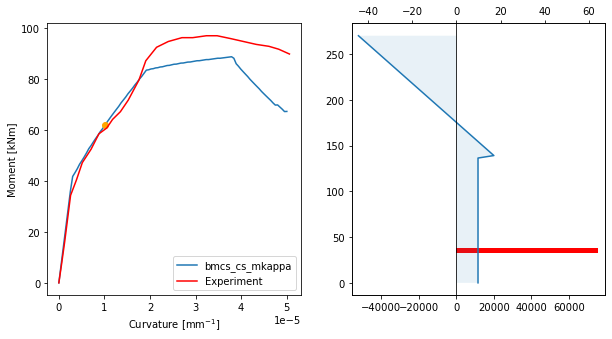

In [20]:
%matplotlib inline

# Curvature values in the Jao_Mobasher_2020 are 10*the source of the experiment (Yang_2010) 
excel_file = join('./verification_data/yao20_yao_mobasher', 'figure_12', 'yan10.xlsx')
data = pd.read_excel(excel_file, engine='openpyxl')
k= data['rho_06_exp_k'] * 1e-5; m= data['rho_06_exp_m']; ver_data = [k, m]
k1= data['rho_06_sim_k'] * 1e-5; m1= data['rho_06_sim_m']; ver_data1 = [k1, m1]
# plt.plot(k, m, '--', label='rho_06 exp')
# plt.plot(k1, m1,  label='rho_06 sim')
# plt.legend();

# rho_06
mc = MKappa(n_m=100, n_kappa = 100)
mc.kappa_slider = 0.00001
mc.low_kappa = 0
mc.high_kappa = 0.00005
map_and_assign_params_for_rectangular_section(mc,
    beta_tu = 21,  # Not sure where this is from, all other values match the paper
        b = 180, # 180 is the original, Saeed used b = 190
        h = 270,
        E = 46418, # according to Yang paper, according to Mobasher 46700
        E_s = 200000,
        f_sy = 600,
        eps_cr = 0.000384,
        rho = 0.0055,
        v_f = 0.02,
        omega = 10.7,
        psi = 7.8,
        mu = 0.55,
        alpha = 0.87,
        lambda_cu = 11.7,)

plot_mk_ver(mc, ver_data)

In [ ]:
%matplotlib widget
mc.E_cc = 3 * mc.E_cc
mc.interact()